In [1]:
# importing requied libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Mthly_HH_Income             50 non-null int64
Mthly_HH_Expense            50 non-null int64
No_of_Fly_Members           50 non-null int64
Emi_or_Rent_Amt             50 non-null int64
Annual_HH_Income            50 non-null int64
Highest_Qualified_Member    50 non-null object
No_of_Earning_Members       50 non-null int64
dtypes: int64(6), object(1)
memory usage: 2.8+ KB


### Descriptive Statistic
     
   Descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.
     
**Mean:**
    The sum of all the values devided by the Number of values.
    $$\mu = \frac{\sum{x}}{n}$$
    
   **__Weighted Mean:__**
       The sum of all the values times a weight devided by the sum of the weights.
      $$\bar{x}_w = \frac{\sum_{i=1}^{n}{w_i x_i}}{\sum_i^{n}{w_i}}$$
       
   **Trimmed Mean:**
       The average of all the values after dropping a fixed number of extreme values.
       $$Trimmed Mean    \bar{x} = \frac{\sum_{i=p+1}^{n-p} x_i}{n-2p}$$
       
       - Trimmed mean eliminates the influence of extreme values.

In [4]:
# Mean
for i in df.select_dtypes(exclude = ['object']):
    m = 0
    for k,j in enumerate(df[i]):
        m +=j
    print("Mean of {} is  {}".format(i,m/(k+1)))    

Mean of Mthly_HH_Income is  41558.0
Mean of Mthly_HH_Expense is  18818.0
Mean of No_of_Fly_Members is  4.06
Mean of Emi_or_Rent_Amt is  3060.0
Mean of Annual_HH_Income is  490019.04
Mean of No_of_Earning_Members is  1.46


In [5]:
# Method 2
for i in df.columns:
    if df[i].dtypes !='O':
        count = 0
        sum1 = 0
        for j in df[i]:
            sum1+=j
            count+=1
        print("Mean of",i," =  ",sum1/count)

Mean of Mthly_HH_Income  =   41558.0
Mean of Mthly_HH_Expense  =   18818.0
Mean of No_of_Fly_Members  =   4.06
Mean of Emi_or_Rent_Amt  =   3060.0
Mean of Annual_HH_Income  =   490019.04
Mean of No_of_Earning_Members  =   1.46


## Median

The `median` is the middle number on a sorted list of the data. If there is an even
number of data values, the middle value is one that is not actually in the data set,
but rather the average of the two values that divide the sorted data into upper and
lower halves.

for odd number of values 
$$Median = \frac{(n + 1)} {2}th$$

for even number of values  Median  is average of middle two values.

In [6]:
n = len(df)
for i in df.select_dtypes(exclude = ['object']):
    S = sorted(df[i])
    if n %2 == 0:
        m1 = S[n//2]
        m2 = S[n//2 - 1]
        median = (m1+m2)/2
    else:
        median = S[n//2]
    print('Median of {} is {}'.format(i,median))

Median of Mthly_HH_Income is 35000.0
Median of Mthly_HH_Expense is 15500.0
Median of No_of_Fly_Members is 4.0
Median of Emi_or_Rent_Amt is 0.0
Median of Annual_HH_Income is 447420.0
Median of No_of_Earning_Members is 1.0


## Mode
    The most commonly occurring category or value in a data set.

In [7]:
for col in df.columns:
    l1 = []
    l = list(df[col].unique())
    for i in l:
        a = list(df[col]).count(i)
        if a not in l1:
            l1.append(a)
        mode_value = sorted(l1,reverse = True)[0]
    for i in l:
        a = list(df[col]).count(i)
        if(a == mode_value):
            print(col + "Mode is : ", i)
            break

Mthly_HH_IncomeMode is :  45000
Mthly_HH_ExpenseMode is :  25000
No_of_Fly_MembersMode is :  4
Emi_or_Rent_AmtMode is :  0
Annual_HH_IncomeMode is :  590400
Highest_Qualified_MemberMode is :  Graduate
No_of_Earning_MembersMode is :  1


## Variance

    The variance is a way of measuring spread, and it’s the average of the distance of values from the mean squared.
    
    Variance tells you the degree of spread in your data set. The more spread the data, the larger the variance is in relation to the mean.
    
$$Variance(\sigma^2) = \frac{\sum{(x-\mu)}^2}{n} $$


## Standard deviation

    The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. If the data points are further from the mean, there is a higher deviation within the data set thus, the more spread out the data, the higher the standard deviation.
$$\sigma = \sqrt{Variance}$$
$$\sigma = \sqrt{\frac{\sum({x_i - {\mu}})^2}{n}}$$

In [8]:
for i in df.select_dtypes(exclude = ['object']):
    m = 0
    for k,j in enumerate(df[i]):
        m +=j
    mean = m/(k+1)
    v = []
    for l in df[i]:
        v.append((l-mean)**2)
    var =sum(v)/len(df)
    sd = var**0.5
        
        
    print("{} of Variance is: {} and Standared Deviation is: {} ".format(i,var,sd))    

Mthly_HH_Income of Variance is: 667478836.0 and Standared Deviation is: 25835.611779092826 
Mthly_HH_Expense of Variance is: 143249876.0 and Standared Deviation is: 11968.704023410388 
No_of_Fly_Members of Variance is: 2.2564 and Standared Deviation is: 1.502131818450032 
Emi_or_Rent_Amt of Variance is: 38176400.0 and Standared Deviation is: 6178.705366013175 
Annual_HH_Income of Variance is: 100437186889.95831 and Standared Deviation is: 316918.26531451027 
No_of_Earning_Members of Variance is: 0.5284 and Standared Deviation is: 0.72691127381545 


### Correlation:

    Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it's a measure of how things are related.

$$ r_xy = \frac{\sum{(x_i-\bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i-\bar{x})^2\sum{(y_i - \bar{y})^2}}}} $$

**Positive linear correlation**
   
       Positive linear correlation is when low values on the x-axis correspond to low values on the y-axis, and higher values of x correspond to higher values of y. In other words, y tends to increase as x increases.
      
**Negative linear correlation**

    Negative linear correlation is when low values on the x-axis correspond to high values on the y-axis, and higher values of x correspond to lower values of y. In other words, y tends to decrease as x increases.
    
    
**No correlation**

    If the values of x and y form a random pattern, then we say there’s no correlation.

In [9]:
def corr_coe(X,Y):
    '''Correlation Function'''
    # Mean of two columns
    mean_X = sum(X)/len(df)
    mean_Y = sum(Y)/len(df)
    
    # Numerator
    num = 0
    for i in range(len(X)):
        num = num + (X[i]-mean_X)*(Y[i]-mean_Y)
        
    # Denominator
    d_x = 0
    for i in range(len(X)):
        d_x = d_x + (X[i]-mean_X)**2

    d_y = 0
    for i in range(len(Y)):
        d_y = d_y + (Y[i]-mean_Y)**2

    d = (d_x * d_y)**0.5

    # Correlation
    corr = num/d
    return corr

In [10]:
for i in df.select_dtypes(exclude='object'):
    for j in df.select_dtypes(exclude='object'):
        print('correlation between {} & {} is: {}'.format(i,j,corr_coe(df[i],df[j])))
    print()

correlation between Mthly_HH_Income & Mthly_HH_Income is: 1.0
correlation between Mthly_HH_Income & Mthly_HH_Expense is: 0.6492152549316461
correlation between Mthly_HH_Income & No_of_Fly_Members is: 0.4483173135943263
correlation between Mthly_HH_Income & Emi_or_Rent_Amt is: 0.03697611093890591
correlation between Mthly_HH_Income & Annual_HH_Income is: 0.9703154166603716
correlation between Mthly_HH_Income & No_of_Earning_Members is: 0.3478834560223838

correlation between Mthly_HH_Expense & Mthly_HH_Income is: 0.6492152549316461
correlation between Mthly_HH_Expense & Mthly_HH_Expense is: 1.0
correlation between Mthly_HH_Expense & No_of_Fly_Members is: 0.6397015597607346
correlation between Mthly_HH_Expense & Emi_or_Rent_Amt is: 0.4052802691623041
correlation between Mthly_HH_Expense & Annual_HH_Income is: 0.5912216295468027
correlation between Mthly_HH_Expense & No_of_Earning_Members is: 0.311915174579754

correlation between No_of_Fly_Members & Mthly_HH_Income is: 0.4483173135943263

## Normal Distribution

 > The normal distribution is in the shape of a bell curve. The curve is symmetrical, with the highest probability density in the center of the curve. The probability density decreases the further away you get from the mean. Both the mean and median are at the center and have the highest probability density
 
 
 ## $$f(x) = \frac{1}{\sigma{\sqrt{2\pi}}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

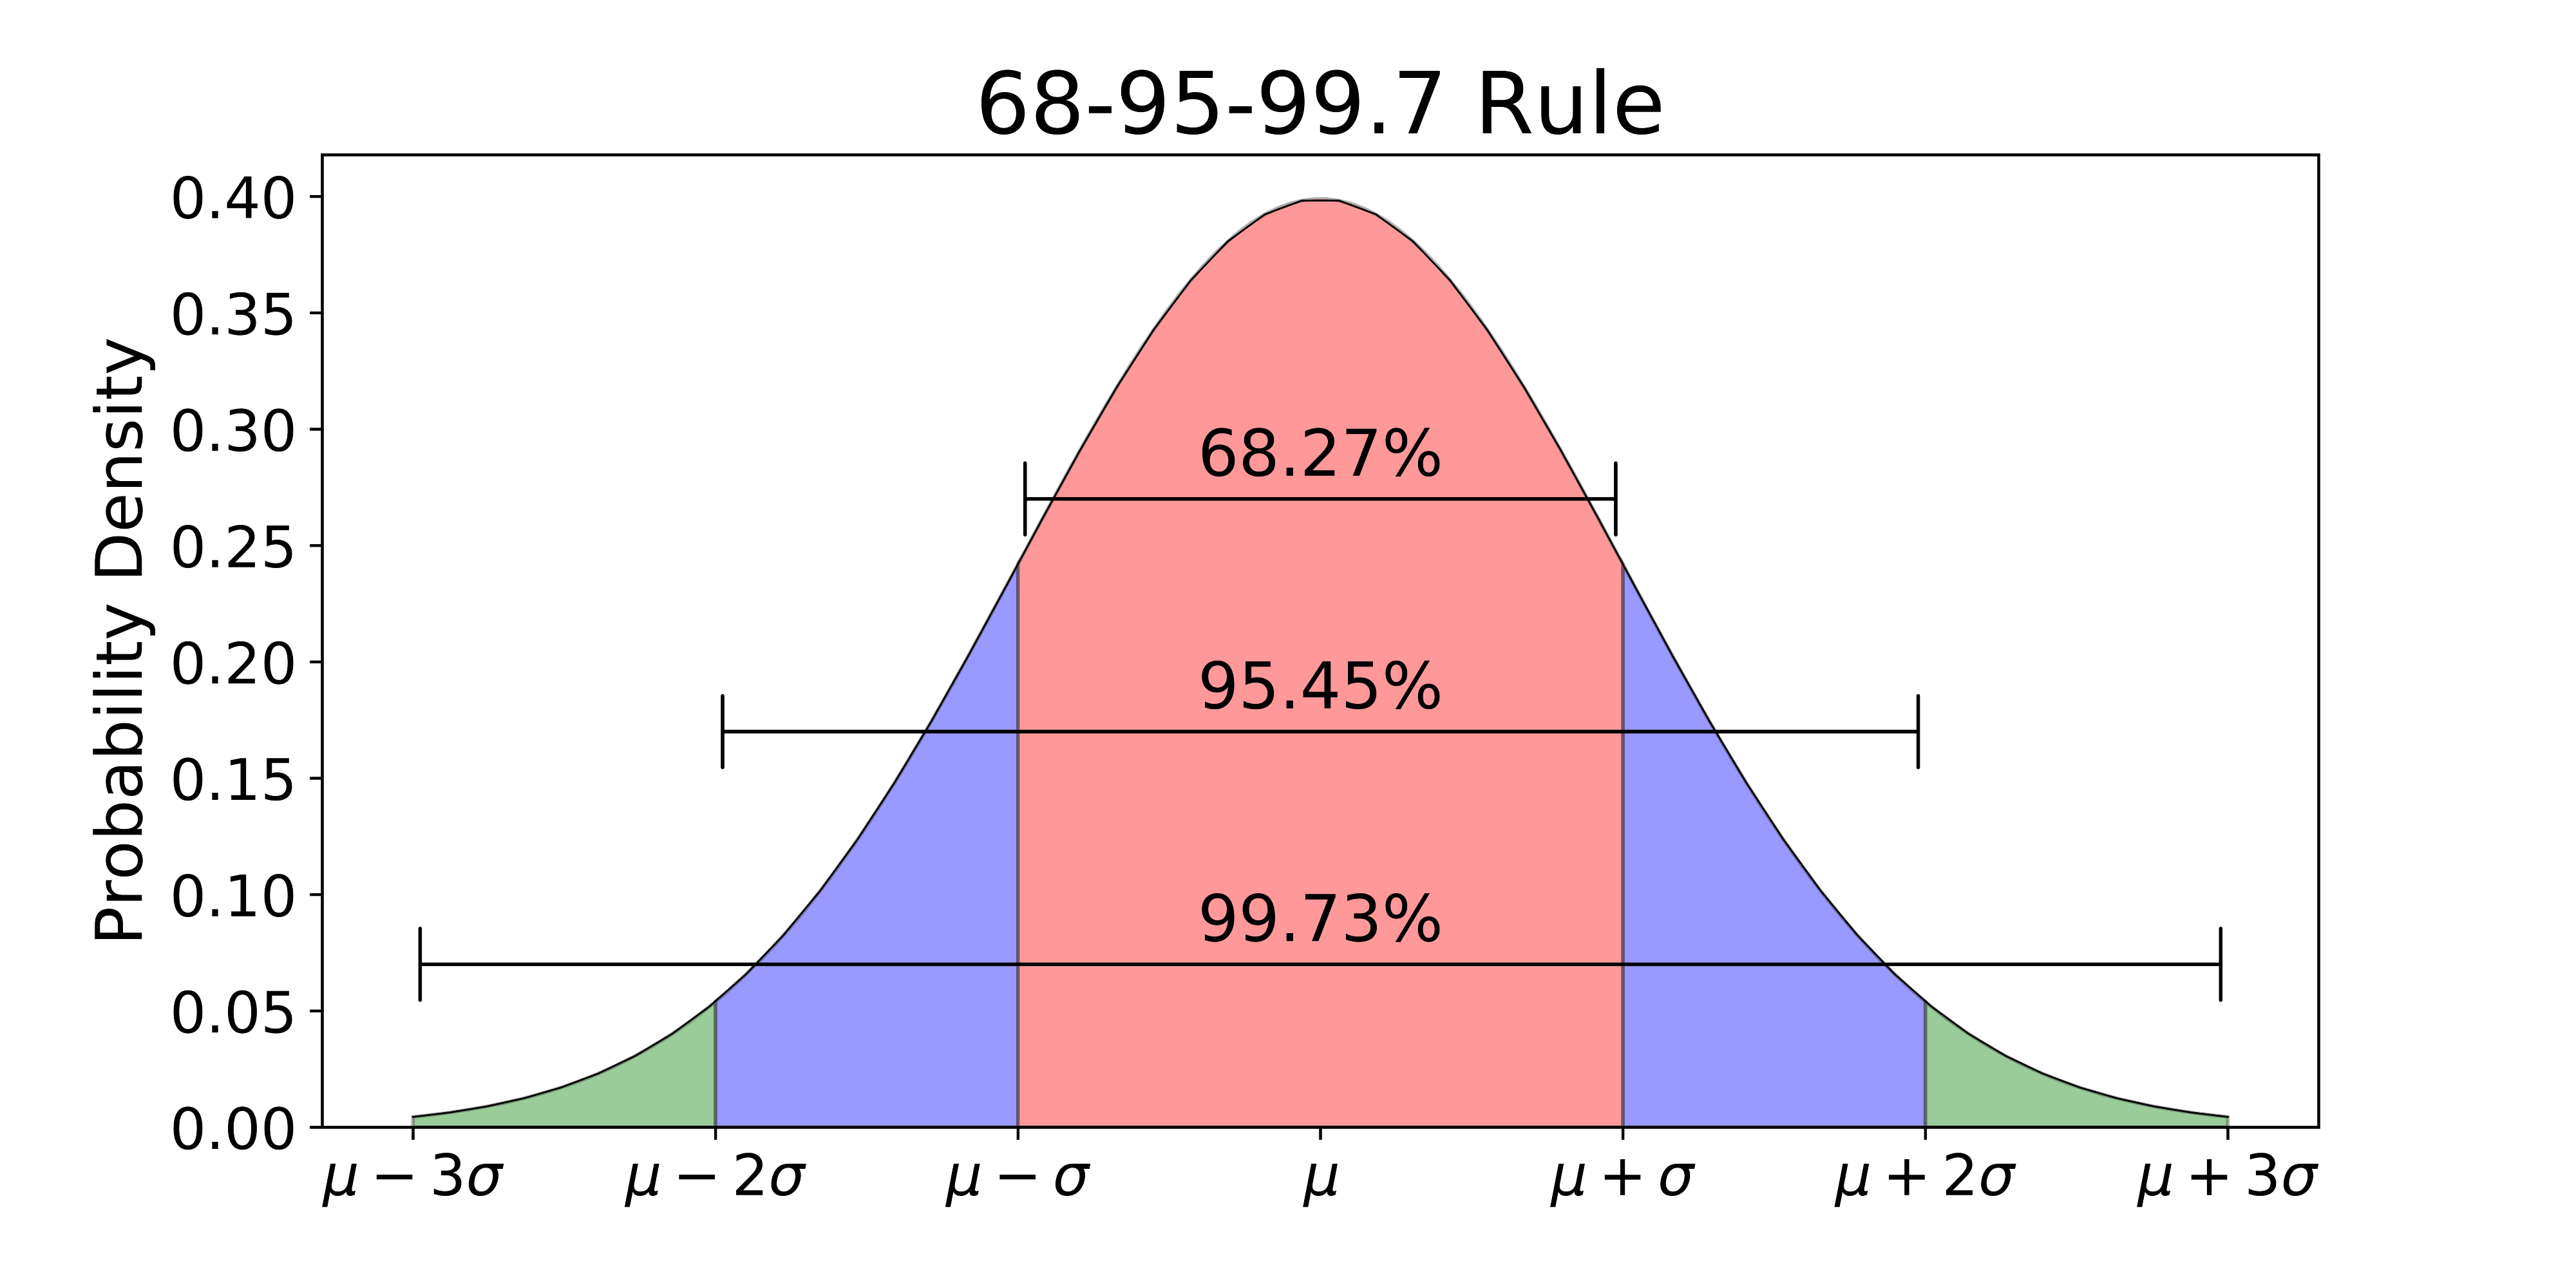

### Properties of Normal Distribution
    
   - The mean, mode and median are all equal.
   - The curve is symmetric at the center (i.e. around the mean, μ).
   - Exactly half of the values are to the left of center and exactly half the values are to the right.
   - The total area under the curve is 1.

## Feature of Normal Distribution       
  **Symmetric**
> A normal distribution comes with a perfectly symmetrical shape. This means that the distribution curve can be divided in the middle to produce two equal halves. The symmetric shape occurs when one-half of the observations fall on each side of the curve.



**The mean, median, and mode are equal**
>The middle point of a normal distribution is the point with the maximum frequency, which means that it possesses the most observations of the variable. The midpoint is also the point where these three measures fall. The measures are usually equal in a perfectly (normal) distribution.



**Empirical rule**

> In normally distributed data, there is a constant proportion of distance lying under the curve between the mean and specific number of standard deviations from the mean. For example, 68.25% of all cases fall within +/- one standard deviation from the mean. 95% of all cases fall within +/- two standard deviations from the mean, while 99% of all cases fall within +/- three standard deviations from the mean.



**Skewness and kurtosis**
> Skewness and kurtosis are coefficients that measure how different a distribution is from a normal distribution. Skewness measures the symmetry of a normal distribution while kurtosis measures the thickness of the tail ends relative to the tails of a normal distribution.

**Positively Skewed Normal Distribution**

    Right-skewed distributions are also called positive-skew distributions. That's because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak. The normal distribution is the most common distribution you'll come across

**Negatively Skewed Normal Distribution**

    the normal distribution is a symmetric distribution with no skew. Left-skewed distributions are also called negatively skewed distributions. That's because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.
    

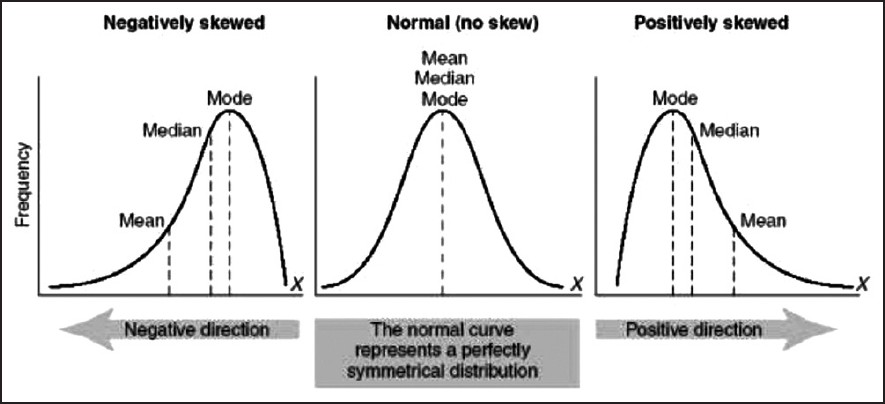

**Effect on Mean, Median and Mode due to Skewness**

>    Generally if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.

______
_____